In [1]:
import sys
import numpy as np
import h5py as h5
import time 
import matplotlib.pyplot as plt

import psana

sys.path.append('/reg/neh/home5/haoyuan/Documents/my_repos/Arsenal')
import arsenal
import arsenal.lcls

# Define parameters

In [5]:
# Experiment info
exp_line = 'amo'
exp_name = 'amox26916'
user_name = 'haoyuan'
run_num = 85
det_name = 'pnccdFront'

# processing info
process_stage = 'scratch'

# Load mask
mask = np.load('/reg/d/psdm/amo/amox26916/scratch/haoyuan/psocake/r0085/masks/jet_streak_1.npy')

# Io info
output_address = '/reg/d/psdm/{}/{}/results/{}/'.format(exp_line, exp_name,user_name)

print("Processing results will be saved to folder {}.".format(output_address))

Processing results will be saved to folder /reg/d/psdm/amo/amox26916/results/haoyuan/.


# Initialize the datasource and detector and mask

In [6]:
# Get data source
ds = psana.DataSource('exp={}:run={}:idx'.format(exp_name, run_num))
run = ds.runs().next()    
env = ds.env()
times = run.times()
evt = run.event(times[0])

# Get pattern number
pattern_num = len(times)
print("There are {} patterns in this run in total.".format(pattern_num))

# Get detector
det = psana.Detector('pnccdFront', env)

# Get 2d mask
mask_2d = det.image(nda_in=mask, evt=evt)

# Cast the mask to boolean values
mask_bool = np.zeros_like(mask, dtype=np.bool)
mask_bool[mask>0.5] = True
mask_bool[mask<0.5] = False

There are 36534 patterns in this run in total.


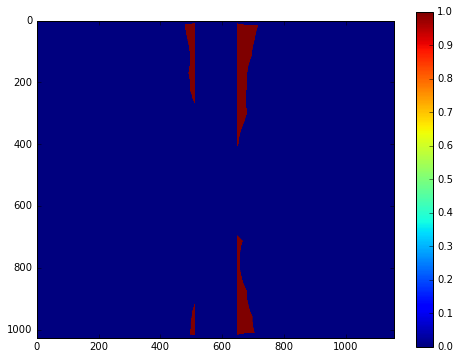

In [7]:
# Show the 2d mask
fig = plt.figure(figsize=(8, 6))
plt.imshow(mask_2d )
plt.colorbar()
plt.show()

# Loop through all patterns 

In [19]:
# Create holder for intensities
intensity_holder = np.zeros(pattern_num)

# holder for calculation time
time_holder = [0,]
tic = time.time()

for pattern_idx in range(pattern_num):
    # Get the pattern
    sample = arsenal.lcls.get_pattern_stack(detector=det, exp_run=run, event_id=pattern_idx)
    
    # Apply the mask
    sample_masked = sample[mask==True]
    
    # Get the intensity
    intensity_holder[pattern_idx] = np.sum(sample_masked)
    
    if np.mod(pattern_idx, 100) == 0:
        time_holder.append(time.time() - tic)
        print("{:.2f} seconds.".format(time_holder[-1]))
    
    
# Save the result
with h5.File(output_address+'{}_run_{}_intensity_{}.h5'.format(exp_name, run_num, arsenal.util.time_stamp()),'w') as h5file:
    h5file.create_dataset(name="mask", data=mask)
    h5file.create_dataset(name="intensity", data=intensity_holder)
    


0.13 seconds.
1.70 seconds.
3.30 seconds.
4.77 seconds.
6.09 seconds.
7.41 seconds.
8.77 seconds.
10.01 seconds.
11.20 seconds.
12.45 seconds.
